In [4]:
#ex1

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

/Users/yulduzerkiniy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [56]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [60]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [61]:
from sklearn.manifold import TSNE



In [62]:
tsne_ = TSNE(n_components=2, learning_rate=250,
                   random_state=42)

In [63]:
X_train_tsne = tsne_.fit_transform(X_train_scaled)

/Users/yulduzerkiniy/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


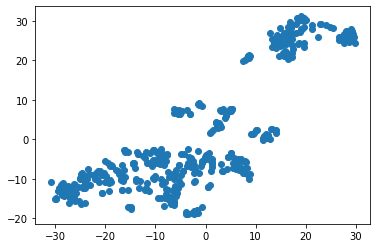

In [64]:
from matplotlib import pyplot as plt


plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])


In [ ]:
#ex2

In [65]:
from sklearn.cluster import KMeans

In [90]:
model = KMeans(n_clusters = 3, random_state = 42, max_iter = 100)

In [74]:
train_labels = model.fit_predict(X_train_scaled)


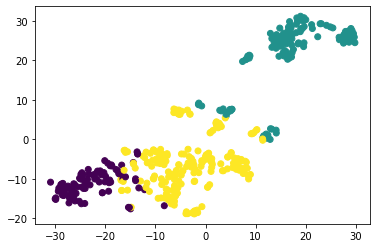

In [76]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)

In [ ]:
#ex3

In [91]:
test_labels = model.fit_predict(X_test_scaled)

In [88]:
X_test_tsne = tsne_.fit_transform(X_test_scaled)

/Users/yulduzerkiniy/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


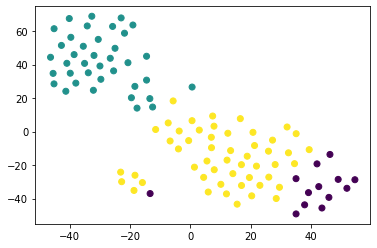

In [93]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=test_labels)

In [109]:
y_test.loc[test_labels==0,'price'].mean()

34.55384615384615

In [110]:
y_test.loc[test_labels==1,'price'].mean()

16.710526315789473

In [111]:
y_test.loc[test_labels==2,'price'].mean()

21.71764705882353

In [113]:
X_test.loc[test_labels==0,'CRIM'].mean()

0.08308461538461537

In [114]:
X_test.loc[test_labels==1,'CRIM'].mean()

9.419181842105264

In [115]:
X_test.loc[test_labels==2,'CRIM'].mean()

0.22250117647058823